In [0]:
from fastai import *
from fastai.tabular import *
import pandas as pd
from torchsummary import summary
import torch
from torch import nn
import imageio
import torch
import glob
from fastai.vision import *
import os
from torch import nn
import torch.nn.functional as F

In [2]:
colab = True
if colab:
  from google.colab import drive
  drive.mount('/content/drive', force_remount = True)
  %cp "/content/drive/My Drive/autoencoder-training/data.zip" .
  !unzip -q data.zip
  image_path = "data"
  %cp "/content/drive/My Drive/autoencoder-training/model_layers.py" .
  %cp "/content/drive/My Drive/autoencoder-training/pretrainedModel.py" .
  import pretrainedModel
  import model_layers
else: 
  os.chdir("../")
  image_path = os.getcwd() + "/data"
  from resnet_autoencoder_training import pretrainedModel


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
np.random.seed(3333)
torch.manual_seed(3333)

size = 32
batchsize = 128

#tfms = get_transforms(do_flip = True)
tfms = get_transforms(do_flip=True, flip_vert=True, max_rotate=10, max_zoom=1.1, max_lighting=0.2, max_warp=0.2, p_affine=0, 
                      p_lighting=0.75)
src = (ImageImageList.from_folder(image_path).split_by_folder().label_from_func(lambda x: x))
data = (src.transform(tfms, size=size, tfm_y=True)
        .databunch(bs=batchsize)
        .normalize(imagenet_stats, do_y = False))

## Pretrained

In [4]:
autoencoder = pretrainedModel.autoencoder(True)

Downloading: "https://github.com/pytorch/vision/archive/v0.5.0.zip" to /root/.cache/torch/hub/v0.5.0.zip
Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


In [0]:
learn = Learner(data, autoencoder, loss_func = F.mse_loss)

In [6]:
learn.fit_one_cycle(5)

epoch,train_loss,valid_loss,time
0,0.072888,0.069278,01:30
1,0.054058,0.054108,01:30
2,0.052618,0.053269,01:30
3,0.051904,0.052505,01:30
4,0.051305,0.052150,01:30


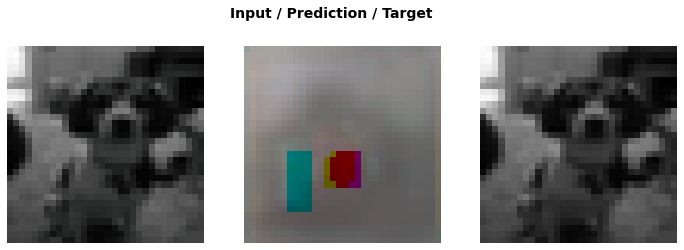

In [7]:
learn.show_results(rows = 1)

In [8]:
learn.split(lambda m: (m.encoder.encoder[0][1], m.encoder.encoder[0][2], m.encoder.encoder[0][3], m.encoder.encoder[0][4], m.encoder.encoder[0][5], 
                       m.encoder.encoder[0][6], m.encoder.encoder[0][7], m.encoder.encoder[1], m.decoder))
print("unfroze")

unfroze


In [9]:
learn.unfreeze()
learn.lr_find()

epoch,train_loss,valid_loss,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Min numerical gradient: 5.25E-03
Min loss divided by 10: 6.31E-02


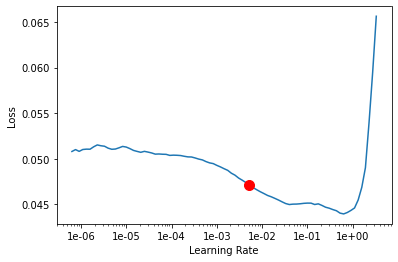

In [10]:
learn.recorder.plot(suggestion = True)

In [12]:
learn.unfreeze()
learn.metrics = [mean_squared_error, mean_absolute_error, r2_score, explained_variance]
learn.fit_one_cycle(10, max_lr = slice(1e-06, 1e-02))

epoch,train_loss,valid_loss,mean_squared_error,mean_absolute_error,r2_score,explained_variance,time
0,0.024163,0.024479,0.024479,0.118226,0.602200,0.605012,01:38
1,0.017911,0.019345,0.019345,0.103568,0.685221,0.687629,01:39
2,0.015217,0.016490,0.016490,0.094723,0.731855,0.731968,01:39
3,0.013649,0.014905,0.014905,0.089476,0.757834,0.758585,01:39
4,0.012012,0.013663,0.013663,0.085231,0.778083,0.778384,01:40
5,0.011462,0.013003,0.013003,0.083683,0.788624,0.789309,01:40
6,0.010764,0.012241,0.012241,0.079697,0.801074,0.801286,01:40
7,0.010149,0.011629,0.011629,0.077491,0.811098,0.811147,01:41
8,0.009948,0.011485,0.011485,0.076756,0.813422,0.813892,01:42
9,0.009822,0.011385,0.011385,0.076558,0.815023,0.815186,01:44


### Results

#### Training

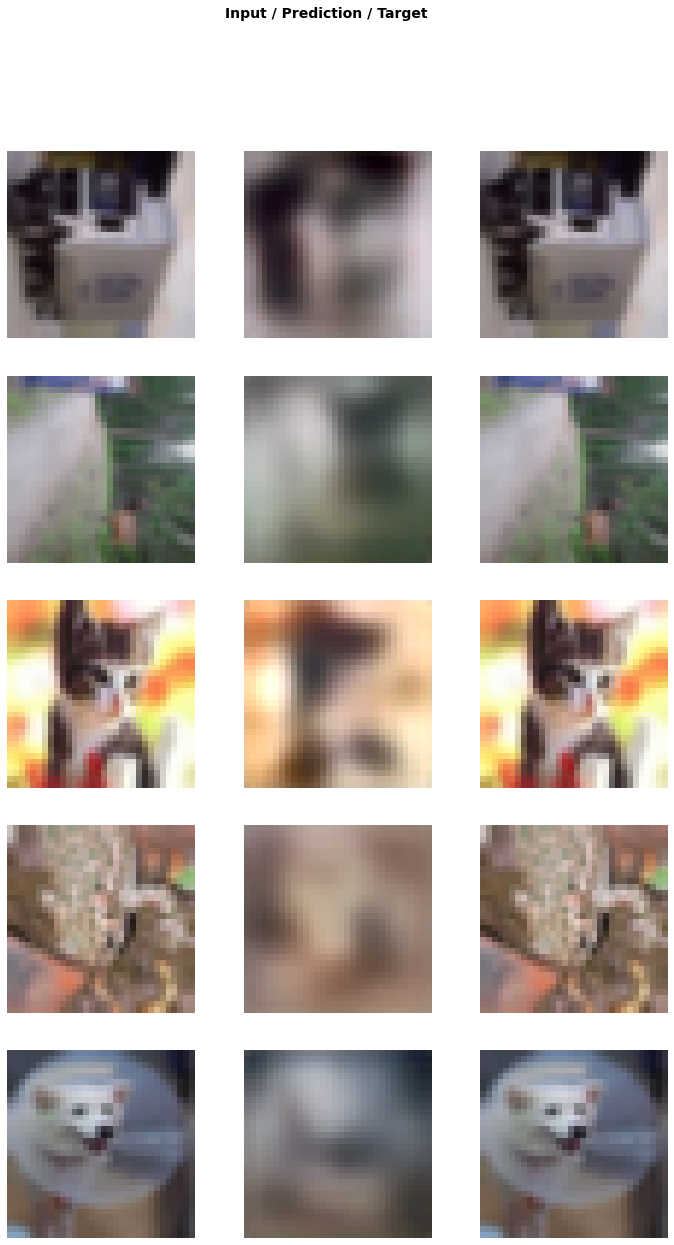

In [13]:
learn.show_results(ds_type=DatasetType.Train)

#### Valid

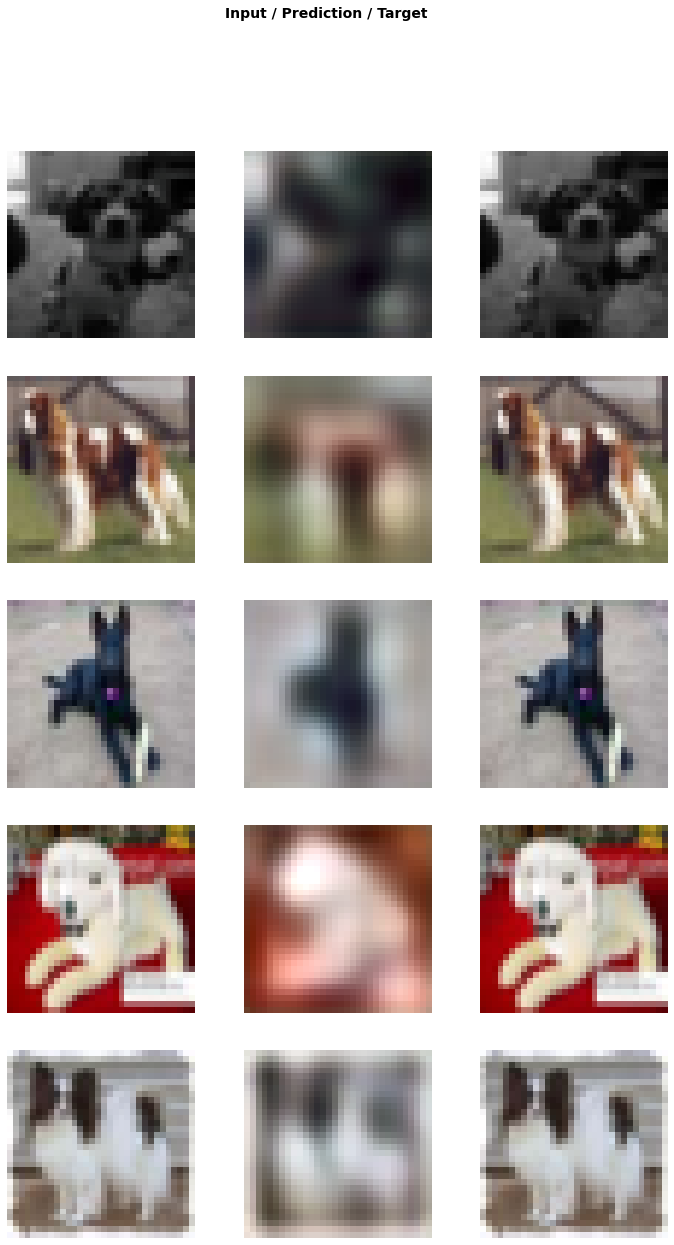

In [14]:
learn.show_results(ds_type=DatasetType.Valid)

In [0]:
torch.save(autoencoder, "/content/drive/My Drive/autoencoder-training/preTrained-Cifar10.pt")

## Not Pretrained

In [16]:
autoencoder = pretrainedModel.autoencoder(False)

Using cache found in /root/.cache/torch/hub/pytorch_vision_v0.5.0


In [0]:
learn = Learner(data, autoencoder, loss_func = F.mse_loss)

In [18]:
learn.fit_one_cycle(5)

epoch,train_loss,valid_loss,time
0,0.025268,0.027941,01:46
1,0.016754,0.019092,01:47
2,0.013564,0.018248,01:48
3,0.012331,0.014490,01:45
4,0.011400,0.013213,01:44


In [19]:
learn.lr_find()

epoch,train_loss,valid_loss,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Min numerical gradient: 6.31E-07
Min loss divided by 10: 5.25E-06


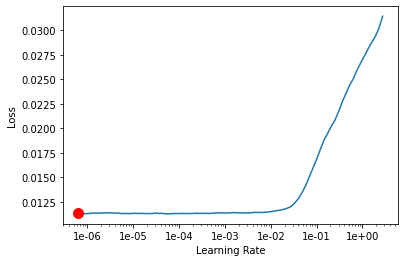

In [20]:
learn.recorder.plot(suggestion = True)

In [21]:
learn.metrics = [mean_squared_error, mean_absolute_error, r2_score, explained_variance]
learn.fit_one_cycle(10, max_lr = 1e-03)

epoch,train_loss,valid_loss,mean_squared_error,mean_absolute_error,r2_score,explained_variance,time
0,0.011367,0.013405,0.013405,0.084846,0.781727,0.782572,01:44
1,0.011089,0.013683,0.013683,0.086622,0.776546,0.780200,01:43
2,0.010621,0.014129,0.014129,0.088631,0.769144,0.775537,01:43
3,0.010035,0.012687,0.012687,0.083375,0.792550,0.794342,01:44
4,0.009775,0.015502,0.015502,0.094217,0.745077,0.745400,01:44
5,0.009386,0.012072,0.012072,0.079879,0.801791,0.801805,01:43
6,0.009127,0.011275,0.011275,0.077332,0.815479,0.815619,01:44
7,0.008968,0.011208,0.011208,0.076575,0.816137,0.818284,01:43
8,0.008814,0.010959,0.010959,0.075116,0.820105,0.820468,01:44
9,0.008849,0.011058,0.011058,0.075097,0.818198,0.818604,01:44


### Results

#### Training

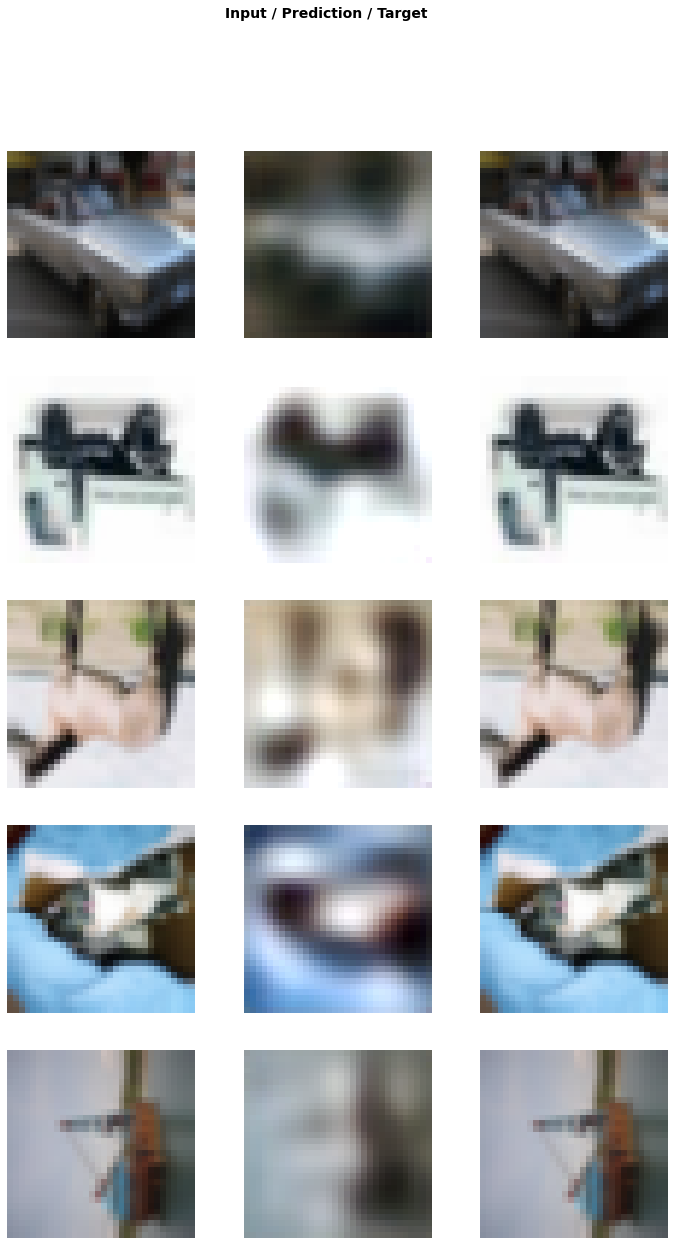

In [22]:
learn.show_results(ds_type=DatasetType.Train)

#### Validation

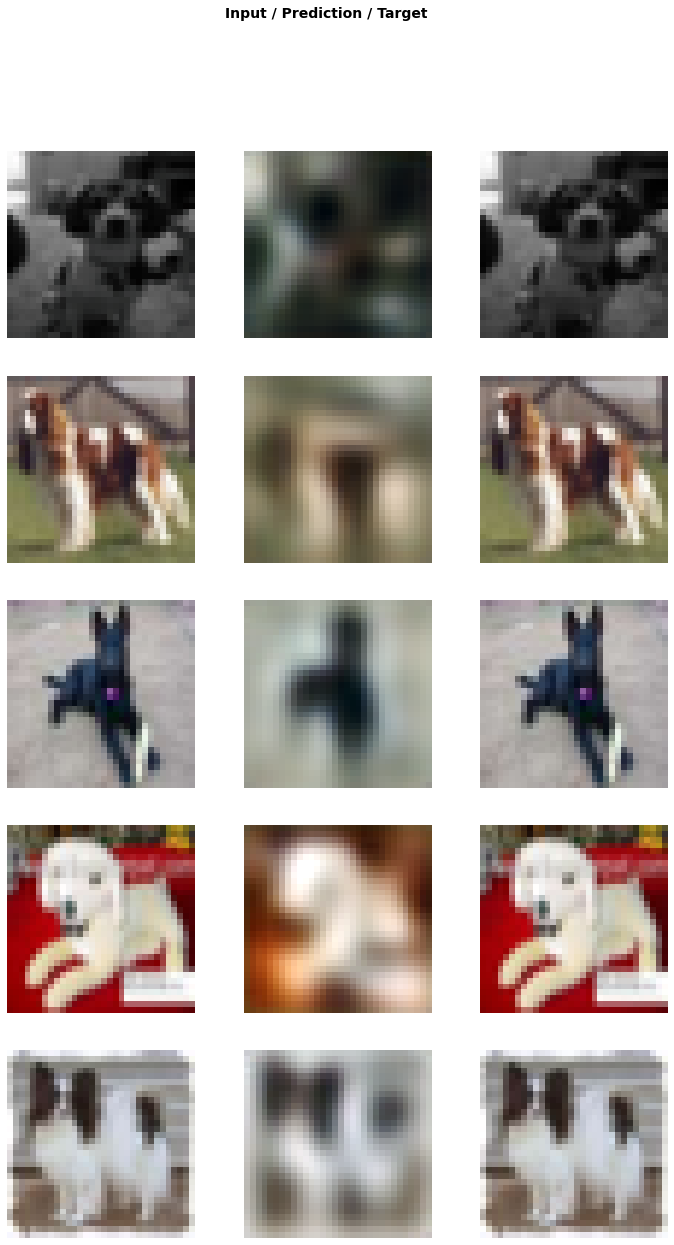

In [23]:
learn.show_results(ds_type=DatasetType.Valid)

In [0]:
torch.save(autoencoder, "/content/drive/My Drive/autoencoder-training/preTrainednonwWeights-Cifar10.pt")